In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('framingham_heart_disease.csv')

In [5]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
import glob
import os

# Create directories
os.makedirs('project_root/data/raw', exist_ok=True)
os.makedirs('project_root/data/processed', exist_ok=True)
os.makedirs('project_root/notebooks', exist_ok=True)
os.makedirs('project_root/scripts', exist_ok=True)
os.makedirs('project_root/reports', exist_ok=True)

# List all files in raw data folder
raw_files = glob.glob('project_root/data/raw/*')
print(raw_files)


[]


In [7]:
print(df.columns)          # Print column names
print(df.dtypes)           # Print data types


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [8]:
print(df.describe(include='all'))  # Get summary statistics


              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

In [9]:
unique_counts = df.nunique()
print(unique_counts)


male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64


In [10]:
range_of_values = df.agg([min, max])
print(range_of_values)


     male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
min     0   32        1.0              0         0.0     0.0                0   
max     1   70        4.0              1        70.0     1.0                1   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
min             0         0    107.0   83.5   48.0  15.54       44.0     40.0   
max             1         1    696.0  295.0  142.5  56.80      143.0    394.0   

     TenYearCHD  
min           0  
max           1  


/var/folders/08/bklv4sgx7wnfq2sn9wk1r9sw0000gn/T/ipykernel_17157/1792030434.py:1: FutureWarning: The provided callable <built-in function min> is currently using Series.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  range_of_values = df.agg([min, max])
/var/folders/08/bklv4sgx7wnfq2sn9wk1r9sw0000gn/T/ipykernel_17157/1792030434.py:1: FutureWarning: The provided callable <built-in function max> is currently using Series.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  range_of_values = df.agg([min, max])


## Data Visualization ( for visualizing outliers)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

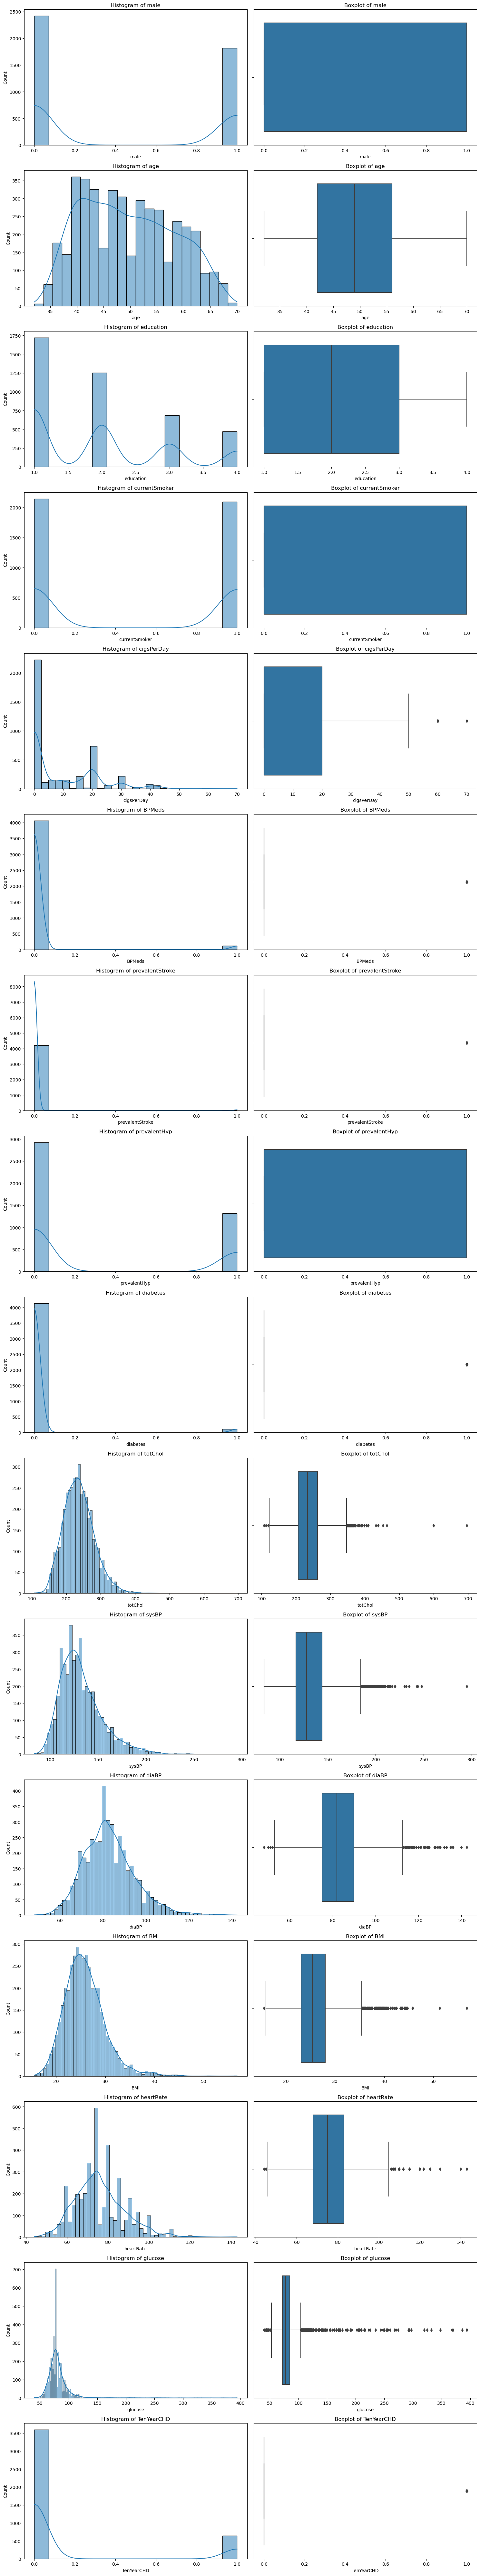

In [19]:
# List of columns to check for outliers
columns = df.columns

# Create subplots
fig, axes = plt.subplots(len(columns), 2, figsize=(15, 5 * len(columns)))

# Plot histograms and boxplots for each column
for i, column in enumerate(columns):
    sns.histplot(df[column].dropna(), kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')
    
    sns.boxplot(x=df[column].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Data Cleaning

In [12]:
# Idendtifying Missing Values:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [13]:
# Removing Duplicates:
duplicates = df.duplicated().sum()
print("Duplicate Rows:")
print(duplicates)

df.drop_duplicates(inplace=True)


Duplicate Rows:
0


In [14]:
# Fill or drop missing values

In [16]:
#Fill missing values in columns glucose with median values:
glucose_median = df['glucose'].median()
df['glucose'].fillna(glucose_median, inplace=True)

In [17]:
# Drop rows with missing values in the 'heartRate' column
df.dropna(subset=['heartRate'], inplace=True)

In [20]:
# Fill missing values in the 'BMI' column with the median since the distribution is skewed
bmi_median = df['BMI'].median()
df['BMI'].fillna(bmi_median, inplace=True)

In [22]:
# Fill missing values in the 'totChol' column with the median since the distribution is skewed
totChol_median = df['totChol'].median()
df['totChol'].fillna(totChol_median, inplace=True)

In [23]:
# Fill missing values in the 'BPMeds' column with the median since the distribution is skewed
BPMeds_median = df['BPMeds'].median()
df['BPMeds'].fillna(BPMeds_median, inplace=True)

In [24]:

# Fill missing values in the 'cigsPerDay' column with the median since the distribution is skewed
cigsPerDay_median = df['cigsPerDay'].median()
df['cigsPerDay'].fillna(cigsPerDay_median, inplace=True)

In [25]:

# Fill missing values in the 'education' column with the median since the distribution is skewed
education_median = df['education'].median()
df['education'].fillna(education_median, inplace=True)

In [26]:
# Re-evaluating for missing values
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64